# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, n_informative=2)
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

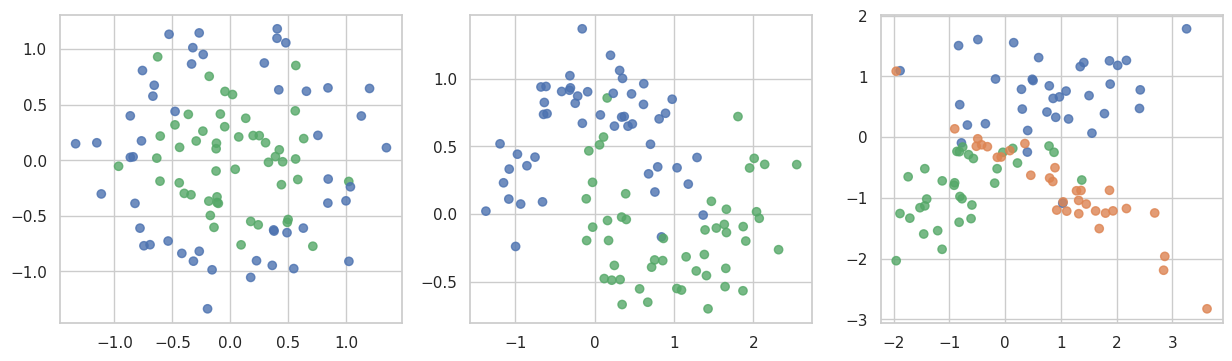

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

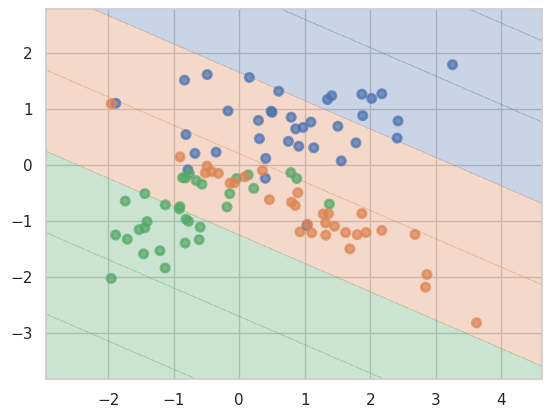

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

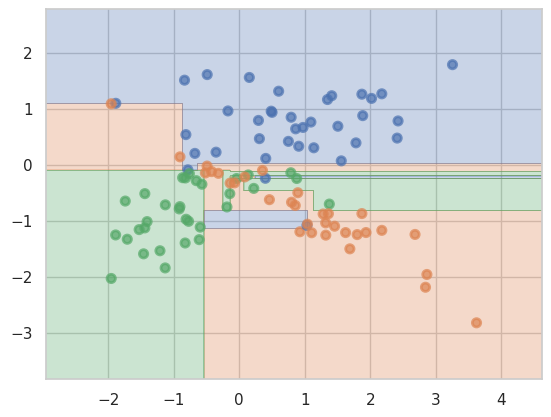

In [7]:
from sklearn.tree import DecisionTreeClassifier

X, y = datasets[2]
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

plot_surface(clf, X, y)
plt.show()

__Ответ:__

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Параметры: {'max_depth': 2}, обучающая и тестовая ошибки: (0.9142857142857143, 0.9333333333333333)


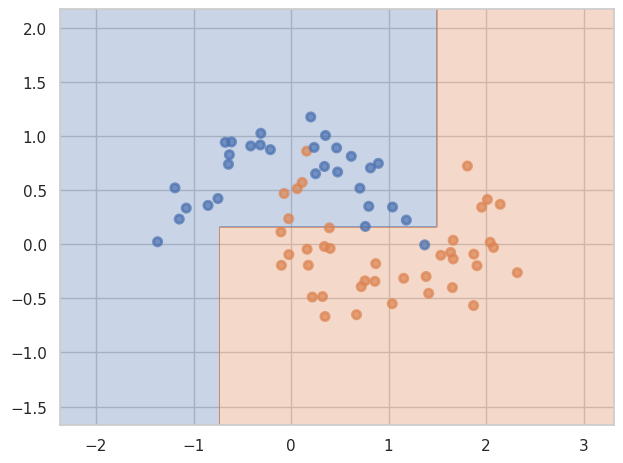

Параметры: {'max_depth': 5}, обучающая и тестовая ошибки: (1.0, 0.8666666666666667)


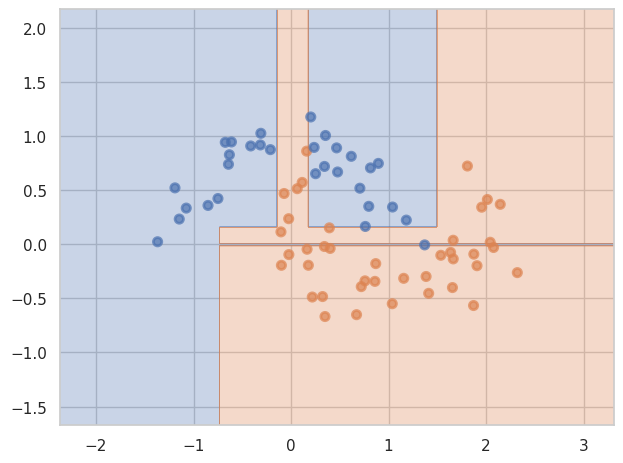

Параметры: {'max_depth': 10}, обучающая и тестовая ошибки: (1.0, 0.8666666666666667)


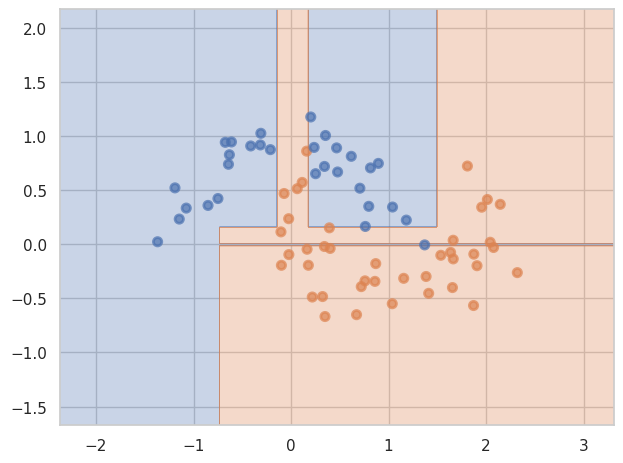

Параметры: {'min_samples_leaf': 1}, обучающая и тестовая ошибки: (1.0, 0.8666666666666667)


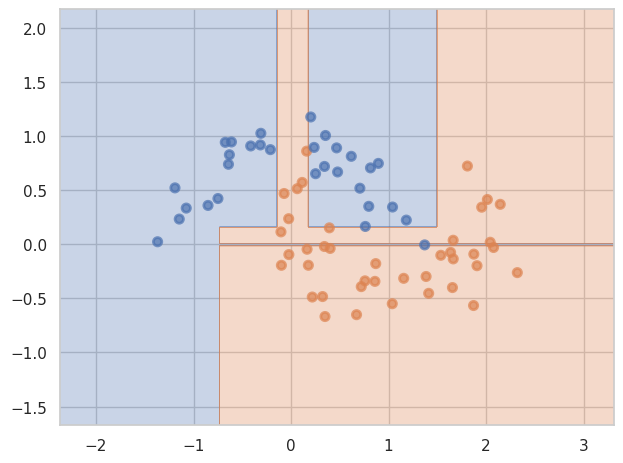

Параметры: {'min_samples_leaf': 5}, обучающая и тестовая ошибки: (0.9571428571428572, 0.7333333333333333)


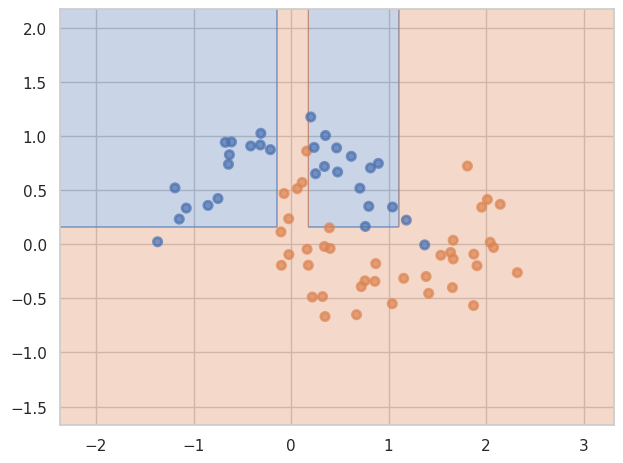

Параметры: {'min_samples_leaf': 10}, обучающая и тестовая ошибки: (0.8714285714285714, 0.7666666666666667)


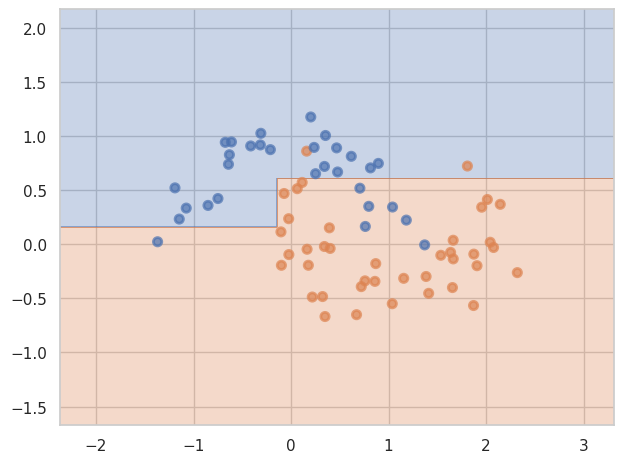

Параметры: {'min_samples_leaf': 20}, обучающая и тестовая ошибки: (0.8428571428571429, 0.8)


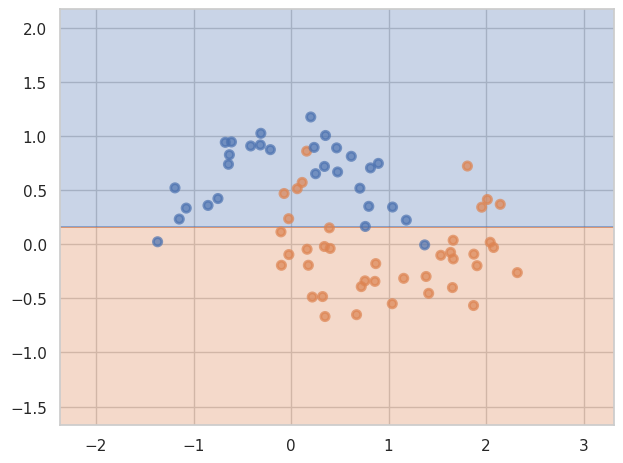

Параметры: {'max_depth': 5, 'min_samples_leaf': 5}, обучающая и тестовая ошибки: (0.9571428571428572, 0.7333333333333333)


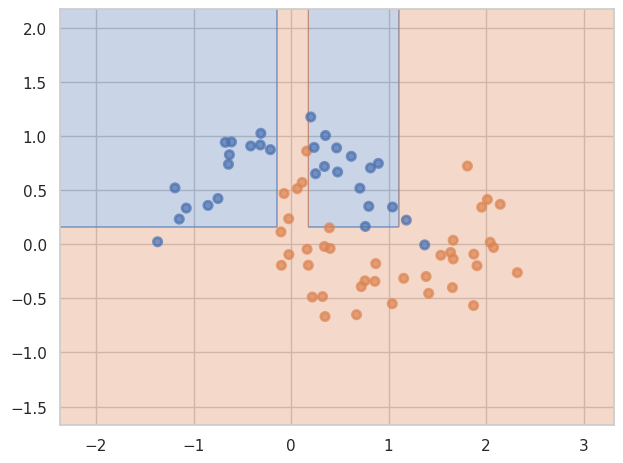

Параметры: {'max_depth': 10, 'min_samples_leaf': 5}, обучающая и тестовая ошибки: (0.9571428571428572, 0.7333333333333333)


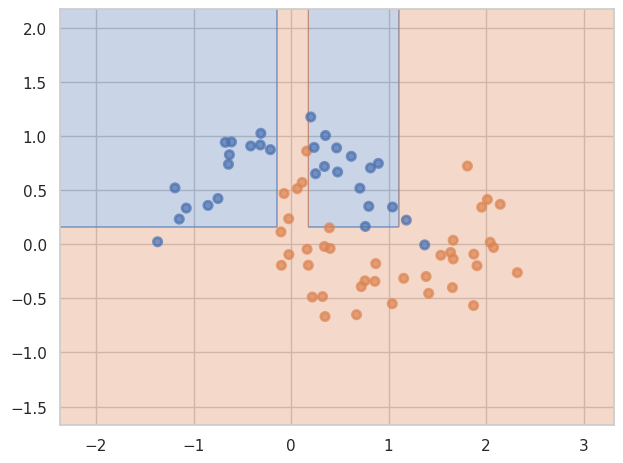

Параметры: {'max_depth': 5, 'min_samples_leaf': 10}, обучающая и тестовая ошибки: (0.8714285714285714, 0.7666666666666667)


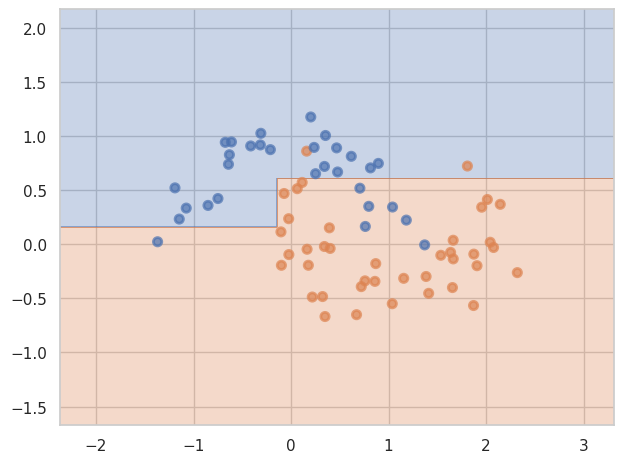

Параметры: {'max_depth': 10, 'min_samples_leaf': 10}, обучающая и тестовая ошибки: (0.8714285714285714, 0.7666666666666667)


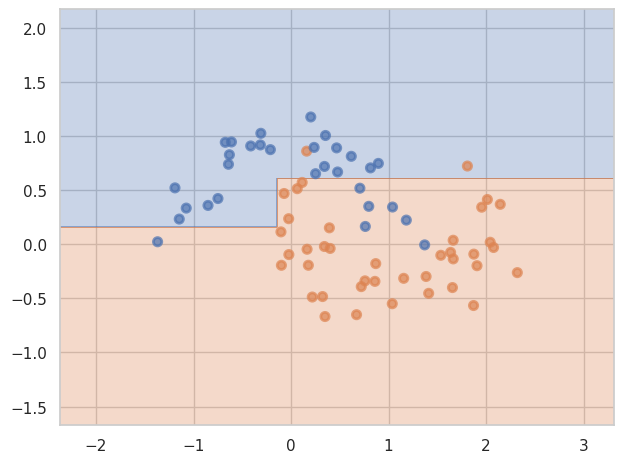

In [8]:
from sklearn.metrics import accuracy_score

params_list = [
    {'max_depth': 2},
    {'max_depth': 5},
    {'max_depth': 10},
    {'min_samples_leaf': 1},
    {'min_samples_leaf': 5},
    {'min_samples_leaf': 10},
    {'min_samples_leaf': 20},
    {'max_depth': 5, 'min_samples_leaf': 5},
    {'max_depth': 10, 'min_samples_leaf': 5},
    {'max_depth': 5, 'min_samples_leaf': 10},
    {'max_depth': 10, 'min_samples_leaf': 10}
]

X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for idx, params in enumerate(params_list):
    clf = DecisionTreeClassifier(**params, random_state=42)
    clf.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Параметры: {params}, обучающая и тестовая ошибки: {train_acc, test_acc}")
    plot_surface(clf, X_train, y_train)
    plt.tight_layout()
    plt.show()


**Ответ:**

При увеличении `max_depth` разделяющая поверхность становится более сложной и лучше подстраивается под обучающую выборку, но может переобучаться на тесте. При малых значениях дерево недообучается.

При увеличении `min_samples_leaf` разделяющая поверхность становится более гладкой, уменьшается переобучение, но может ухудшиться качество на обучающей выборке.

Для разных датасетов оптимальные параметры различаются:
- Для простых данных (circles, moons) нужна большая глубина
- Для более сложных данных важен баланс между сложностью и обобщающей способностью

Комбинация параметров позволяет достичь лучшего баланса между bias и variance.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

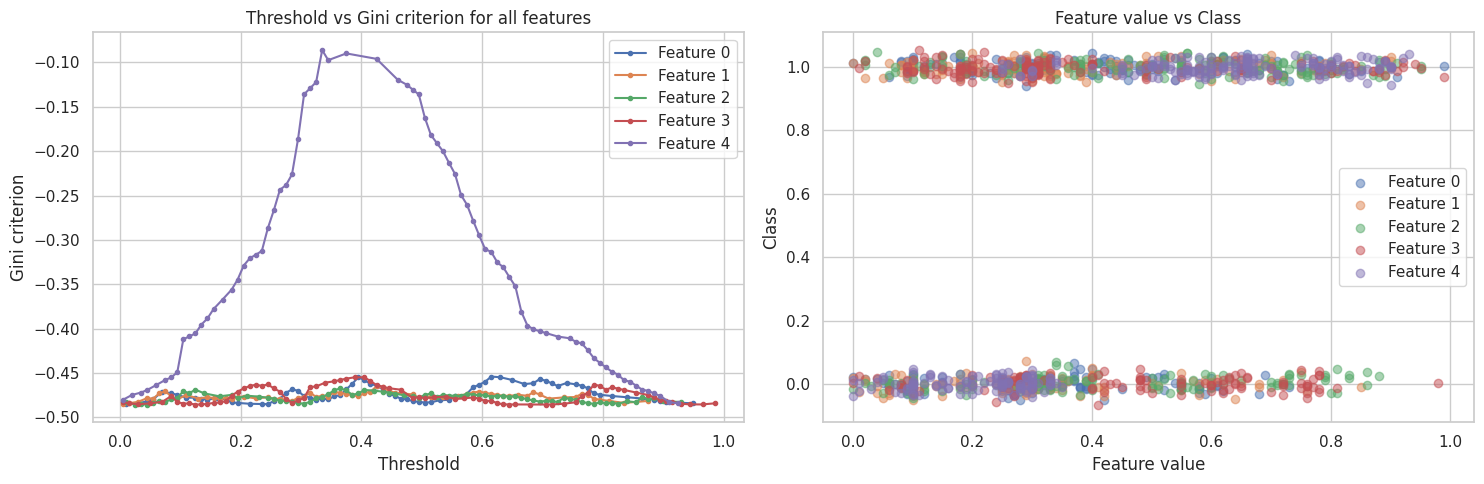

In [9]:
from hw2code import find_best_split

data = pd.read_csv('datasets/students.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax1 = axes[0]
for i in range(X.shape[1]):
    thresholds, ginis, _, _ = find_best_split(X[:, i], y)
    ax1.plot(thresholds, ginis, label=f'Feature {i}', marker='o', markersize=3)

ax1.set_xlabel('Threshold')
ax1.set_ylabel('Gini criterion')
ax1.set_title('Threshold vs Gini criterion for all features')
ax1.legend()
ax1.grid(True)

ax2 = axes[1]
for i in range(X.shape[1]):
    ax2.scatter(X[:, i], y + np.random.randn(len(y)) * 0.02, alpha=0.5, label=f'Feature {i}')

ax2.set_xlabel('Feature value')
ax2.set_ylabel('Class')
ax2.set_title('Feature value vs Class')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

По графику критерия Джини видно, что деление нужно производить по 4 признаку (фиолетовая кривая), так как он имеет максимальное значение критерия Джини (около -0.10), что означает наилучшее разделение классов.

Это полностью согласуется с визуальной оценкой scatter-графиков: признак 4 показывает четкое разделение классов - значения около 0 соответствуют классу 0, а значения около 1 соответствуют классу 1, с минимальным перекрытием в области 0.4-0.6.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from hw2code import DecisionTree

data = pd.read_csv('datasets/agaricus-lepiota.data', header=None)

X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

le_y = LabelEncoder()
y = le_y.fit_transform(y)

for col in range(X.shape[1]):
    le = LabelEncoder()
    X[:, col] = le.fit_transform(X[:, col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical'] * X.shape[1]
clf = DecisionTree(feature_types)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

def get_tree_depth(node):
    if node.get('type') == 'terminal':
        return 0
    return 1 + max(get_tree_depth(node.get('left_child', {})), 
                   get_tree_depth(node.get('right_child', {})))

depth = get_tree_depth(clf._tree)
print(f'Tree depth: {depth}')

Accuracy: 1.0000
Tree depth: 8


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import OneHotEncoder

datasets_info = {
    'mushrooms': ('agaricus-lepiota.data', 0, True),
    'tic-tac-toe': ('tic-tac-toe-endgame.csv', -1, False),
    'cars': ('car.data', -1, False),
    'nursery': ('nursery.data', -1, False)
}

results = []

for dataset_name, (filename, target_col, has_header) in datasets_info.items():
    print(f'Processing {dataset_name}...')
    
    data = pd.read_csv("datasets/" + filename, header=None)
    
    if target_col == 0:
        X = data.iloc[:, 1:].values
        y = data.iloc[:, 0].values
    else:
        X = data.iloc[:, :-1].values
        y = data.iloc[:, -1].values
    
    if dataset_name == 'cars':
        y = pd.Series(y).map({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1}).values
    elif dataset_name == 'nursery':
        y = pd.Series(y).map({'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1}).values
    else:
        le_y = LabelEncoder()
        y = le_y.fit_transform(y)
    
    X_encoded = X.copy()
    for col in range(X.shape[1]):
        le = LabelEncoder()
        X_encoded[:, col] = le.fit_transform(X[:, col])
    
    feature_types_real = ['real'] * X_encoded.shape[1]
    feature_types_cat = ['categorical'] * X_encoded.shape[1]
    
    scorer = make_scorer(accuracy_score)
    
    clf_real = DecisionTree(feature_types_real)
    score_real = cross_val_score(clf_real, X_encoded, y, cv=10, scoring=scorer).mean()
    
    clf_cat = DecisionTree(feature_types_cat)
    score_cat = cross_val_score(clf_cat, X_encoded, y, cv=10, scoring=scorer).mean()
    
    ohe = OneHotEncoder(sparse_output=False)
    X_ohe = ohe.fit_transform(X_encoded)
    feature_types_ohe = ['real'] * X_ohe.shape[1]
    clf_ohe = DecisionTree(feature_types_ohe)
    score_ohe = cross_val_score(clf_ohe, X_ohe, y, cv=10, scoring=scorer).mean()
    
    clf_sklearn = DecisionTreeClassifier(random_state=42)
    score_sklearn = cross_val_score(clf_sklearn, X_encoded, y, cv=10, scoring=scorer).mean()
    
    results.append({
        'Dataset': dataset_name,
        'DT Real': score_real,
        'DT Categorical': score_cat,
        'DT Real+OHE': score_ohe,
        'sklearn DT': score_sklearn
    })
    
    print(f'{dataset_name}: Real={score_real:.4f}, Cat={score_cat:.4f}, OHE={score_ohe:.4f}, sklearn={score_sklearn:.4f}')

results_df = pd.DataFrame(results)
print('\n' + '='*80)
print(results_df)

Processing mushrooms...
mushrooms: Real=0.9993, Cat=1.0000, OHE=0.9996, sklearn=0.9604
Processing tic-tac-toe...
tic-tac-toe: Real=0.4971, Cat=0.6013, OHE=0.5742, sklearn=0.7854
Processing cars...
cars: Real=0.9426, Cat=0.9675, OHE=0.9195, sklearn=0.9427
Processing nursery...
nursery: Real=0.9997, Cat=0.9998, OHE=0.9995, sklearn=0.9997

       Dataset   DT Real  DT Categorical  DT Real+OHE  sklearn DT
0    mushrooms  0.999261        1.000000     0.999631    0.960384
1  tic-tac-toe  0.497083        0.601250     0.574167    0.785351
2         cars  0.942647        0.967546     0.919495    0.942707
3      nursery  0.999691        0.999846     0.999537    0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

**Одинаково ли ранжируются алгоритмы?**

Нет, ранжирование сильно различается:
- На mushrooms, cars, nursery: Categorical = Real > OHE > sklearn
- На tic-tac-toe: sklearn >> Categorical > OHE > Real

**Почему так происходит?**

Причина в природе признаков:
- **Mushrooms, cars, nursery** имеют истинно категориальные признаки без естественного порядка (например, цвет, форма). Наша категориальная реализация учитывает это через преобразование по соотношению классов, что дает лучшие результаты.
- **Tic-tac-toe** имеет признаки с 3 значениями (x, o, b), где порядок неважен, но пространство признаков сложнее. Sklearn использует более продвинутые эвристики (например, критерий разбиения, обрезка дерева), что позволяет строить более глубокие и качественные деревья.

**Компонента случайности:**

Да, присутствует:
- В cross-validation (разные fold'ы)
- В нашей реализации нет случайности, но sklearn может использовать random_state для разрешения неоднозначностей

**Как улучшить?**

1. Реализовать параметры max_depth, min_samples_split в нашем DecisionTree
2. На tic-tac-toe увеличить глубину - сейчас дерево явно недообучается (accuracy ~0.5-0.6)
3. Использовать правильное кодирование для каждого типа признаков
4. Добавить обрезку (pruning) для предотвращения переобучения